## CH7. 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,pca_x,pca_y
0,5.1,3.5,1.4,0.2,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,-2.888991,-0.144949


In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [4]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           3
        2          47
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,pca_x,pca_y,target,cluster
0,5.1,3.5,1.4,0.2,-2.684126,0.319397,0,1
1,4.9,3.0,1.4,0.2,-2.714142,-0.177001,0,1
2,4.7,3.2,1.3,0.2,-2.888991,-0.144949,0,1


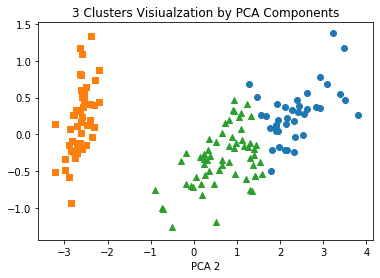

In [6]:
#군집 값이 0,1,2,인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

#군집 값 0,1,2,에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.xlabel('PCA 2')
plt.title('3 Clusters Visiualzation by PCA Components')
plt.show()

In [16]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)
print(X,y)
#y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[[-1.69242695  3.62202539]
 [ 0.69794036  4.4288665 ]
 [ 1.10022802  4.60631734]
 [-1.44872404  3.38424521]
 [ 1.21486062  5.36489604]
 [-0.90830163  1.97077775]
 [ 2.47211942  0.43703328]
 [ 1.65684156  2.4412893 ]
 [ 1.07779975  4.62537882]
 [-1.67942681  2.60200265]
 [ 0.65372852  5.28174338]
 [-0.97188549  2.79022351]
 [ 1.58510026  4.40112734]
 [ 1.29307545  3.42933812]
 [ 0.25043139  4.34534364]
 [-1.07307179  2.73974218]
 [ 2.68432989  0.52452838]
 [ 2.16883005  0.64220093]
 [ 0.32575305  2.92276125]
 [-3.15145159  4.56947655]
 [-1.06408682  3.19760583]
 [ 1.45946366  0.23651283]
 [ 1.01287689  4.15404025]
 [ 1.73407165  4.17977925]
 [-3.3313554   2.09987679]
 [-0.3148482   4.1335951 ]
 [ 1.5403728  -0.88105886]
 [-2.13821915  1.76764908]
 [-0.84056487  3.83076375]
 [-1.57620513  2.83203804]
 [ 1.34880003  3.07479238]
 [ 0.9846701   5.73248372]
 [-1.56064117  2.68837251]
 [ 0.64537489  3.70582348]
 [ 1.40457611 -0.2754758 ]
 [ 2.47438034  0.96840133]
 [ 1.2613632

In [8]:
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


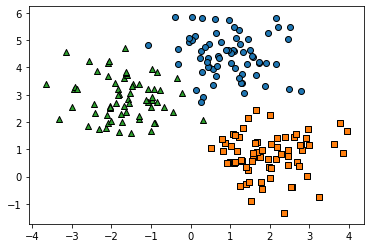

In [9]:
target_list = np.unique(y)
#각 타깃별 산점도의 마커 값
markers=['o','s', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target == 0, target == 1, target == 2 로 scatter plot을 amrker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y= target_cluster['ftr2'], edgecolor='k',marker=markers[target])
plt.show()

[2 0 0 2 0 2 1 1 0 2 0 2 0 0 0 2 1 1 0 2 2 1 0 0 2 0 1 2 2 2 0 0 2 0 1 1 0
 1 1 2 1 2 2 2 0 0 0 2 0 0 0 1 2 2 2 2 1 1 0 0 2 2 0 1 1 2 1 1 2 1 1 0 0 2
 0 2 1 1 1 2 2 0 0 1 1 0 0 2 0 1 2 2 1 0 1 0 0 2 2 1 1 0 2 0 2 0 1 0 2 1 0
 2 1 2 0 0 0 1 2 2 1 1 2 0 1 0 2 1 2 0 2 1 1 1 0 1 1 0 1 2 2 2 0 1 1 0 2 2
 1 0 1 2 2 2 0 1 1 1 0 0 1 2 2 2 0 0 1 2 1 1 0 1 0 1 2 2 0 2 0 1 0 2 1 1 1
 0 2 1 0 0 2 2 1 1 1 1 2 1 0 1]
[0 1 2]


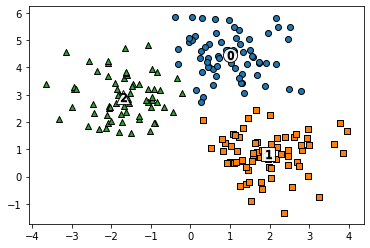

In [14]:
# KMeans 객체를 이용해 X데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3,init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
print(cluster_labels)
clusterDF['kmeans_label'] = cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
print(unique_labels)
markers = ['o','s','^','P','D','H','x']

#군집된 label 유형별로 iteratuion 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    #군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y = center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y = center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$'%label)
    
plt.show()

### 7-2 균집평가

In [ ]:
#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score





In [58]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] =dbscan_labels
irisDF['target'] =iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64
